In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date
import time
import calendar
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [50]:
users = pd.read_csv('~/Documents/GADS/GA_project/data/train_users_2.csv')
print users.shape
users.head()

(213451, 16)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [51]:
# check if there're any null values in any of the columns
users.isnull().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                     False
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser              False
country_destination        False
dtype: bool

In [52]:
# check if any other unacceptable values are there for the data
for col in users:
    print users[col].value_counts(dropna=False) #.sort_values(ascending=False)

wm38s2q7pp    1
fz8fyrqknz    1
g0b5k92fnd    1
ptxn4ogd0k    1
tzo0e8lk5z    1
xt0vzu9vcm    1
oajrf3lkii    1
3gmgg6ppjh    1
j37m27vevg    1
d8srr4bsak    1
npas2bmqfi    1
a7x0r02fnm    1
6vaug42gve    1
fflgbqfju5    1
ckd3ulzf5n    1
23y7zgrcvu    1
e6bdxdlct8    1
72mog8egx1    1
np9zqryfyi    1
wqe40q2g4o    1
ykbrt7wu7k    1
fl4wznakez    1
cgojos987z    1
eom5xrhnci    1
no7w34vzmr    1
lk3samqnel    1
s9ru84sg89    1
jtw737orux    1
siusf9j73z    1
mi8wc5noc3    1
             ..
rf8x8psk7w    1
qeo3b00fxw    1
4stkyaj1ta    1
yw7jzva3cj    1
p36904uano    1
dwf36i7e9p    1
ywhx0hj3du    1
yrqosmstlh    1
z324fsmbn2    1
q5b88sbhm3    1
jkyeehte6r    1
xic10kyps0    1
r0qtkwla97    1
a66hp3h4vg    1
3y7ogeflni    1
d5qdxyutec    1
yuhhmmuqkm    1
xd4wb3j3o8    1
hyje5jgkhr    1
wbfryh8zbb    1
ockpf8ry20    1
zrybr4wnvz    1
89051qhulh    1
09nb7istts    1
dc3udjfdij    1
vi42vea4nb    1
8ygwexreru    1
5st2vn53qj    1
oixuuowelt    1
7wcr7si82f    1
Name: id, dtype: int64
2

#1 : Findings


1. first_browser  has -unknown-' values.
2. gender has '-unknown-' values.
3. date_first_booking has NaN values.
4. age has NaN values
5. first_affiliate_tracked  has NaN values.

In [53]:
# replace '-unknown-' values with "Other" values
users.gender.replace('-unknown-', 'NotDisclosed', inplace=True) # to match with "OTHER" categories present in the data along with Male, and Female.
users.first_browser.replace('-unknown-', 'OTHER', inplace=True)

In [54]:
# Let's calculate %age of missing data in each column and display only the missing columns
users_nan = (users.isnull().sum()/float(users.shape[0]))*100    #### rounding function throws an error : 'float' object has no attribute '__getitem__'
users_nan[users_nan > 0]
#users.isnull().sum()

date_first_booking         58.347349
age                        41.222576
first_affiliate_tracked     2.841402
dtype: float64

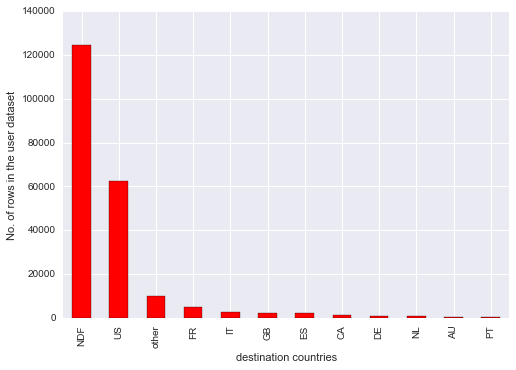

In [55]:
# Let's plot country_destinations
users.country_destination.value_counts(dropna=False).plot(kind='bar', color = 'red')
plt.xlabel('destination countries')
plt.ylabel('No. of rows in the user dataset')

In [9]:
users.date_first_booking.isnull().sum()

124543

In [10]:
users.country_destination[users.country_destination == 'NDF'].count()

124543

#2: Findings
About 58.5% of users did not book any destinations. Hence, the date_first_booking is null. Since there are no bookings, there is no "country_destination" (labelled : NDF) recorded for those rows. Let's drop these rows since it won't help in the prediction.

In [20]:
users = users[users.country_destination <> 'NDF']

In [21]:
# Gender column
users.gender.unique()

array(['FEMALE', 'NotDisclosed', 'MALE', 'OTHER'], dtype=object)

In [22]:
(users.gender.value_counts()/users.gender.count())*100

FEMALE          35.984388
NotDisclosed    32.638233
MALE            31.179421
OTHER            0.197957
Name: gender, dtype: float64

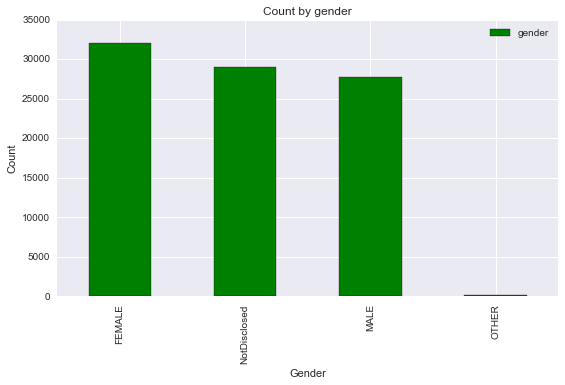

In [24]:
users.gender.value_counts().plot(kind = 'bar', color = 'green')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count by gender')
plt.legend()
plt.tight_layout()
plt.show()

#3: Findings
* Only 176 out of 59890 ( 0.29% of total users) listed their gender as 'Other'. 
* About 32% of data not listed as either male or female.

For the purpose of the project, let's drop these rows.

In [15]:
#users = users[users.gender <> 'OTHER']


In [25]:
# Age column analysis:
users.age.describe()

count    68532.000000
mean        47.872629
std        146.042716
min          2.000000
25%         28.000000
50%         33.000000
75%         42.000000
max       2014.000000
Name: age, dtype: float64

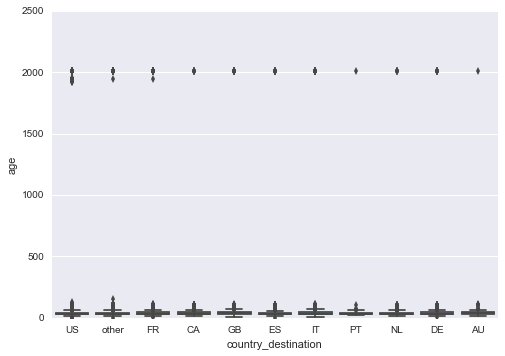

In [26]:
sns.boxplot(x="country_destination", y="age", data=users)

In [27]:
users.age[users.age > 150].value_counts()

2014.0    342
2013.0     15
1949.0      2
1947.0      2
1932.0      2
1929.0      2
1924.0      2
2008.0      1
1942.0      1
1938.0      1
1936.0      1
1935.0      1
1931.0      1
1926.0      1
Name: age, dtype: int64

In [30]:
sum((users.age.isnull()/users.age.count())*100)

29.732095955177922

#4: Findings
The age data seems to have lot of errous data. 
* 18 < age < 100 seems to be reasonable age limit of the user for the service based on their sing-up policies and avg age of a person in US. All other entries which claims to be < 18 years of age or > 100 years age seems like erroreous data.
* Age ranging anywhere between 1926 - 1949 seems like a year of birth 
* Age ranging anywhere between 2008 - 2014 seems like year of user sign up
* as always, there are about 41% data that are null. 

For simplification of this project, let's fill all the erroreous and missing age with median age. 

In [32]:
# Let's fill the median age for all missing age 
users.age.fillna(users.age.median(), inplace=True)

In [22]:
# Checking if there are any nulls:
sum(users.age.isnull())

0

In [33]:
# Let's fill median age whereever the age is < 18 or > 100
ages = users.age.values
ages = np.where(ages > 100, users.age.median(), ages)
ages = np.where(ages < 18, users.age.median(), ages)
users['age'] = ages

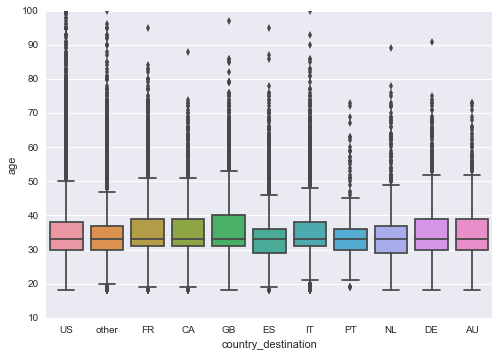

In [34]:
sns.boxplot(x="country_destination", y="age", data=users)

In [ ]:
# Null Accuracy (for presentation)

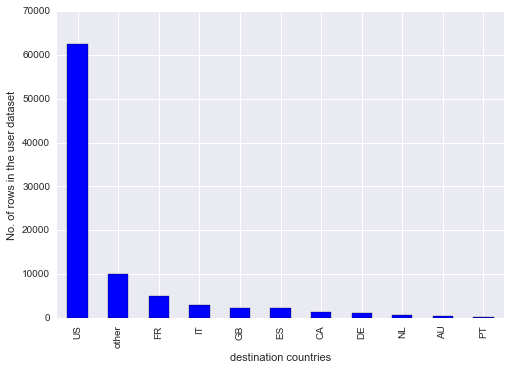

In [35]:
# Let's plot country_destinations
users.country_destination.value_counts(dropna=False).plot(kind='bar', color = 'blue')
plt.xlabel('destination countries')
plt.ylabel('No. of rows in the user dataset')

In [38]:
users.first_affiliate_tracked.value_counts()

untracked        47739
linked           20102
omg              16425
tracked-other     2290
product            542
marketing           63
local ops            9
Name: first_affiliate_tracked, dtype: int64

In [39]:
# Let's take care of NAs in first_affiliate_tracked and first_browser columns
# users = users.fillna(-1) # can be used to fill all NAs without inspecting the datatypes but let's replace with 'Other' instead.
users.first_affiliate_tracked.fillna('Other', inplace=True)
users.first_browser.fillna('Other', inplace=True)


In [40]:
(users.isnull().sum()/float(users.shape[0]))*100


id                         0.0
date_account_created       0.0
timestamp_first_active     0.0
date_first_booking         0.0
gender                     0.0
age                        0.0
signup_method              0.0
signup_flow                0.0
language                   0.0
affiliate_channel          0.0
affiliate_provider         0.0
first_affiliate_tracked    0.0
signup_app                 0.0
first_device_type          0.0
first_browser              0.0
country_destination        0.0
dtype: float64

## Now that all the missing values and NAs values are taken care in the datasets, Let's find out the data types and see if anything needs to be changed.

In [41]:
#find out the datatypes of all columns
users.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

# Let's change the date columns to a datetime object. 

In [42]:
# Change the column types with date fields  to datetime
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['timestamp_first_active'] = pd.to_datetime(users['date_account_created'], format='%Y%m%d%H%M%S') 
users['date_first_booking'] = pd.to_datetime(users['date_account_created'])

In [43]:
# Make a new year/month/day column for date account created
users['dac_year'] = users['date_account_created'].apply(lambda x:x.year)
users['dac_month'] = users['date_account_created'].apply(lambda x:x.month)
users['dac_day'] = users['date_account_created'].apply(lambda x:x.day)
users['dac_wn'] = users['date_account_created'].apply(lambda x:x.isocalendar()[1]) 
users['dac_wd'] = users['date_account_created'].apply(lambda x:calendar.day_name[x.weekday()])
users.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,dac_year,dac_month,dac_day,dac_wn,dac_wd
2,4ft3gnwmtx,2010-09-28,2010-09-28,2010-09-28,FEMALE,56.0,basic,3,en,direct,...,untracked,Web,Windows Desktop,IE,US,2010,9,28,39,Tuesday
3,bjjt8pjhuk,2011-12-05,2011-12-05,2011-12-05,FEMALE,42.0,facebook,0,en,direct,...,untracked,Web,Mac Desktop,Firefox,other,2011,12,5,49,Monday


In [44]:
# Make a new year/month/day column for timestamp_first_active 
users['tfa_year'] = users['timestamp_first_active'].apply(lambda x:x.year)
users['tfa_month'] = users['timestamp_first_active'].apply(lambda x:x.month)
users['tfa_day'] = users['timestamp_first_active'].apply(lambda x:x.day)
users['tfa_wn'] = users['timestamp_first_active'].apply(lambda x:x.isocalendar()[1]) 
users['tfa_wd'] = users['timestamp_first_active'].apply(lambda x:calendar.day_name[x.weekday()])
users.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,dac_year,dac_month,dac_day,dac_wn,dac_wd,tfa_year,tfa_month,tfa_day,tfa_wn,tfa_wd
2,4ft3gnwmtx,2010-09-28,2010-09-28,2010-09-28,FEMALE,56.0,basic,3,en,direct,...,2010,9,28,39,Tuesday,2010,9,28,39,Tuesday
3,bjjt8pjhuk,2011-12-05,2011-12-05,2011-12-05,FEMALE,42.0,facebook,0,en,direct,...,2011,12,5,49,Monday,2011,12,5,49,Monday


In [45]:
# Make a new year/month/day column for date first booking
users['dfb_year'] = users['date_first_booking'].apply(lambda x:x.year)
users['dfb_month'] = users['date_first_booking'].apply(lambda x:x.month)
users['dfb_day'] = users['date_first_booking'].apply(lambda x:x.day)
users['dfb_wn'] = users['date_first_booking'].apply(lambda x:x.isocalendar()[1]) 
users['dfb_wd'] = users['date_first_booking'].apply(lambda x:calendar.day_name[x.weekday()])

users.head(2)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,tfa_year,tfa_month,tfa_day,tfa_wn,tfa_wd,dfb_year,dfb_month,dfb_day,dfb_wn,dfb_wd
2,4ft3gnwmtx,2010-09-28,2010-09-28,2010-09-28,FEMALE,56.0,basic,3,en,direct,...,2010,9,28,39,Tuesday,2010,9,28,39,Tuesday
3,bjjt8pjhuk,2011-12-05,2011-12-05,2011-12-05,FEMALE,42.0,facebook,0,en,direct,...,2011,12,5,49,Monday,2011,12,5,49,Monday


In [46]:
#time deltas
delta_tfa_dac = users['timestamp_first_active'] - users['date_account_created'] #.total_seconds() #time_to_signup
delta_tfa_dfb = users['timestamp_first_active'] - users['date_first_booking'] #.total_seconds() #time_to_book
print delta_tfa_dac.describe()
print delta_tfa_dfb.describe()

count              88908
mean     0 days 00:00:00
std      0 days 00:00:00
min      0 days 00:00:00
25%      0 days 00:00:00
50%      0 days 00:00:00
75%      0 days 00:00:00
max      0 days 00:00:00
dtype: object
count              88908
mean     0 days 00:00:00
std      0 days 00:00:00
min      0 days 00:00:00
25%      0 days 00:00:00
50%      0 days 00:00:00
75%      0 days 00:00:00
max      0 days 00:00:00
dtype: object


In [47]:
'''
If time permits, Let's add season to the dataset: stackoverflow code:
def season(date, hemisphere):
    #date is a datetime object
    #hemisphere is either 'north' or 'south', dependent on long/lat.
    
    md = date.month * 100 + date.day

    if ((md > 320) and (md < 621)):
        s = 0 #spring
    elif ((md > 620) and (md < 923)):
        s = 1 #summer
    elif ((md > 922) and (md < 1223)):
        s = 2 #fall
    else:
        s = 3 #winter

    if hemisphere != 'north':
        if s < 2:
            s += 2 
        else:
            s -= 2

    return s

'''

"\nIf time permits, Let's add season to the dataset: stackoverflow code:\ndef season(date, hemisphere):\n    #date is a datetime object\n    #hemisphere is either 'north' or 'south', dependent on long/lat.\n    \n    md = date.month * 100 + date.day\n\n    if ((md > 320) and (md < 621)):\n        s = 0 #spring\n    elif ((md > 620) and (md < 923)):\n        s = 1 #summer\n    elif ((md > 922) and (md < 1223)):\n        s = 2 #fall\n    else:\n        s = 3 #winter\n\n    if hemisphere != 'north':\n        if s < 2:\n            s += 2 \n        else:\n            s -= 2\n\n    return s\n\n"

#5: Findings

* The time taken to signup and time taken to book are calculating as 'Zero days' so do not seems to be relevant for our prediction. However, if the duration in seconds can be determined, that might help.

* Hemisphere(South/North) can be determined using Country files’s longitude and latitude information. That information can further be used to determine "season". 

But for the purpose of this project, let’s use only Year/Month/Day/WeekNo/Weekday information. 

# Some fun facts:

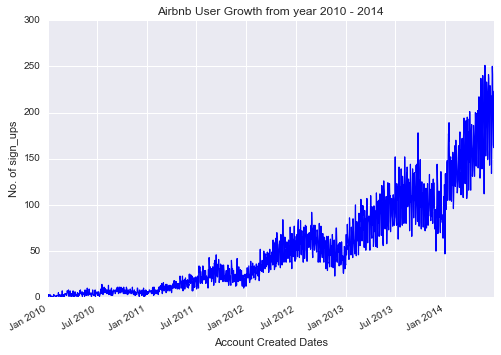

In [49]:
# plotting the date_account_created over time
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='blue')
plt.xlabel('Account Created Dates')
plt.ylabel('No. of sign_ups')
plt.title('Airbnb User Growth from year 2010 - 2014')


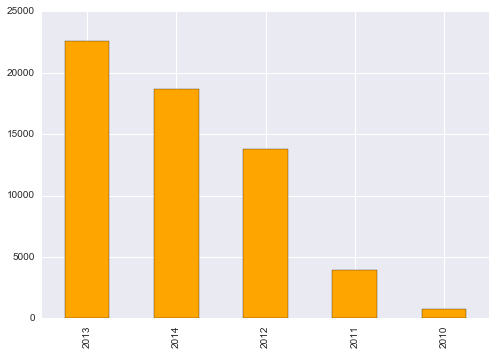

In [36]:
# popular booking year
users.dfb_year.value_counts().plot(kind='bar', color = 'orange')

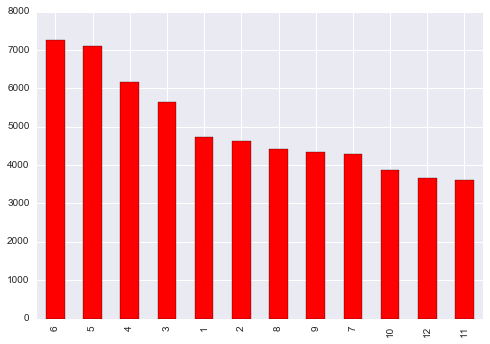

In [37]:
# popular booking month
users.dfb_month.value_counts().plot(kind='bar', color = 'red')


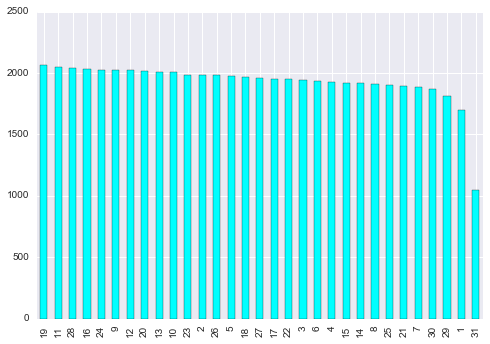

In [38]:
# popular booking day
users.dfb_day.value_counts().plot(kind='bar', color = 'cyan')

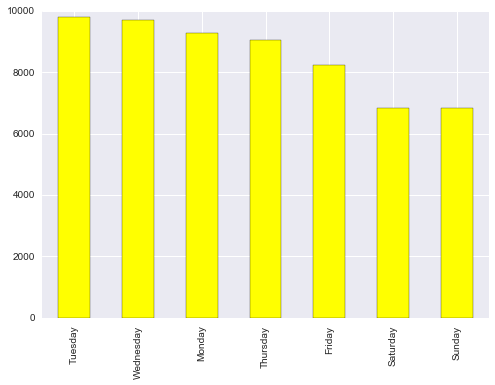

In [39]:
# popular booking weekday
users.dfb_wd.value_counts().plot(kind='bar', color = 'yellow')

In [40]:
users.shape

(59714, 31)

## Now that all the datatypes are numeric, let's make the dataset ready for prediction by converting them into binary variables or dummies variables.

In [41]:
users.columns

Index([u'id', u'date_account_created', u'timestamp_first_active',
       u'date_first_booking', u'gender', u'age', u'signup_method',
       u'signup_flow', u'language', u'affiliate_channel',
       u'affiliate_provider', u'first_affiliate_tracked', u'signup_app',
       u'first_device_type', u'first_browser', u'country_destination',
       u'dac_year', u'dac_month', u'dac_day', u'dac_wn', u'dac_wd',
       u'tfa_year', u'tfa_month', u'tfa_day', u'tfa_wn', u'tfa_wd',
       u'dfb_year', u'dfb_month', u'dfb_day', u'dfb_wn', u'dfb_wd'],
      dtype='object')

In [42]:
# Date dummies:

#DAC
users_dac_month = pd.get_dummies(users.dac_month, prefix='dac_month')
users_dac_day = pd.get_dummies(users.dac_day, prefix='dac_day')
users_dac_wn = pd.get_dummies(users.dac_wn, prefix='dac_wn')
users_dac_wd = pd.get_dummies(users.dac_wd, prefix='dac_wd')

# drop the original columns for which dummies are created
users = users.drop(['date_account_created', 'dac_month', 'dac_day', 'dac_wn', 'dac_wd'], axis=1)

# concat with the name dataframe
users = pd.concat((users, users_dac_month, users_dac_day, users_dac_wn, users_dac_wd), axis=1)

# TFA
users_tfa_month = pd.get_dummies(users.tfa_month, prefix='tfa_month')
users_tfa_day = pd.get_dummies(users.tfa_day, prefix='tfa_day')
users_tfa_wn = pd.get_dummies(users.tfa_wn, prefix='tfa_wn')
users_tfa_wd = pd.get_dummies(users.tfa_wd, prefix='tfa_wd')

users = users.drop(['timestamp_first_active', 'tfa_month', 'tfa_day', 'tfa_wn', 'tfa_wd'], axis=1)

users = pd.concat((users, users_tfa_month, users_tfa_day, users_tfa_wn, users_tfa_wd), axis=1)

#DFB
users_dfb_month = pd.get_dummies(users.dfb_month, prefix='dfb_month')
users_dfb_day = pd.get_dummies(users.dfb_day, prefix='dfb_day')
users_dfb_wn = pd.get_dummies(users.dfb_wn, prefix='dfb_wn')
users_dfb_wd = pd.get_dummies(users.dfb_wd, prefix='dfb_wd')

users = users.drop(['date_first_booking', 'dfb_month', 'dfb_day', 'dfb_wn', 'dfb_wd'], axis=1)

users = pd.concat((users, users_dfb_month, users_dfb_day, users_dfb_wn, users_dfb_wd), axis=1)

In [43]:
# Rest of the columns except age
col_names = ['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', \
             'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']
for c in col_names:
    users_dummy = pd.get_dummies(users[c], prefix=c)
    users = users.drop([c], axis=1)
    users = pd.concat((users, users_dummy), axis=1)
    
# age, user_id - main df
# dates done seperately

In [44]:
users.shape

(59714, 442)

# Now that the user data is ready, Let's review and clean the session data 

#Session Data

## web sessions log for users
* user_id: to be joined with the column 'id' in users table
* action
* action_type
* action_detail
* device_type
* secs_elapsed

In [45]:
sessions = pd.read_csv('~/Documents/GADS/GA_project/data/sessions.csv')
print sessions.shape
sessions.head()

(10567737, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [46]:
sessions.isnull().any()

user_id           True
action            True
action_type       True
action_detail     True
device_type      False
secs_elapsed      True
dtype: bool

In [47]:
# replace unknown values with NaN values
sessions.action.replace('-unknown-', np.NaN, inplace=True)
sessions.action_type.replace('-unknown-', np.NaN, inplace=True)
sessions.action_detail.replace('-unknown-', np.NaN, inplace=True)
sessions.device_type.replace('-unknown-', np.NaN, inplace=True)

In [48]:
# fill in unknown values
sessions.action = sessions.action.fillna('Other')
sessions.action_type = sessions.action_type.fillna('Other')
sessions.action_detail = sessions.action_detail.fillna('Other')
sessions.device_type = sessions.device_type.fillna('Other')

In [49]:
# Let's calculate %age of missing data in each column and display only the missing columns
sessions_nan = (sessions.isnull().sum()/float(sessions.shape[0]))*100 
sessions_nan[sessions_nan > 0]

user_id         0.326428
secs_elapsed    1.287229
dtype: float64

In [50]:
# Top 10 action percentages 
action = ((sessions.action.value_counts()/sessions.action.count())*100).to_frame()
action.head(10)

,action
show,26.195561
index,7.983724
search_results,6.862642
personalize,6.688509
search,5.072581
ajax_refresh_subtotal,4.615406
update,3.455139
similar_listings,3.450351
social_connections,3.207877
reviews,3.033677


In [51]:
# Top 10 action types
action_type = ((sessions.action_type.value_counts()/sessions.action_type.count())*100).to_frame()
action_type.head(10)

,action_type
view,33.695975
Other,20.414721
data,19.907479
click,18.889408
submit,5.898680
message_post,0.824235
partner_callback,0.181042
booking_request,0.177644
modify,0.010778
booking_response,0.000038


In [52]:
# Top 10 action detail in %age
action_detail = ((sessions.action_detail.value_counts()/sessions.action_detail.count())*100).to_frame().head(10)
action_detail

,action_detail
Other,20.414446
view_search_results,16.814243
p3,13.025968
wishlist_content_update,6.688509
user_profile,6.215512
change_trip_characteristics,4.615406
similar_listings,3.450351
user_social_connections,3.187049
update_listing,2.552855
listing_reviews,2.545682


In [53]:
# Top 10 Device types used in browsing in perctanges
device = ((sessions.device_type.value_counts()/sessions.device_type.count())*100).to_frame()
device

,device_type
Mac Desktop,34.011880
Windows Desktop,25.157127
iPhone,19.919411
Android Phone,7.945287
iPad Tablet,6.466985
Android App Unknown Phone/Tablet,2.589504
Other,1.999283
Tablet,1.323708
Linux Desktop,0.268487
Chromebook,0.211474


# Fun Facts:

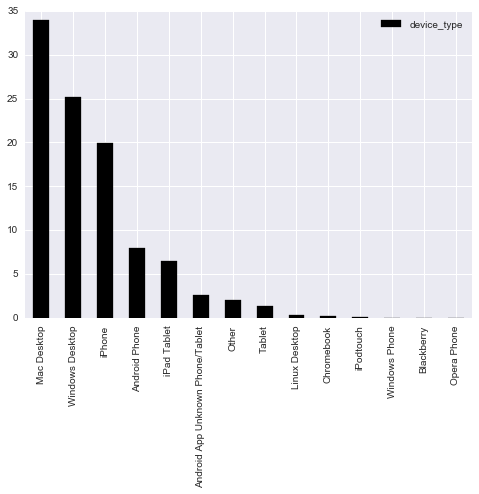

In [54]:
# device distribution over all sessions
device.plot(kind='bar', color='black')

In [55]:
# removing few columns for ease of use #testing

scols = [col for col in sessions.columns if col not in ['action', 'action_detail']]
sessions = sessions[scols]


In [56]:
sessions.head()

,user_id,action_type,device_type,secs_elapsed
0,d1mm9tcy42,Other,Windows Desktop,319.0
1,d1mm9tcy42,click,Windows Desktop,67753.0
2,d1mm9tcy42,Other,Windows Desktop,301.0
3,d1mm9tcy42,click,Windows Desktop,22141.0
4,d1mm9tcy42,Other,Windows Desktop,435.0


#6: Findings
* The session data has lot of categories for each column. It would be helpful if a dataframe can be built keeping the value counts of each type for each column. 

For the purpose of this project, let's keep the columns as is, and create dummies and merge it with users.

In [57]:
# Dummies for all session columns:
col_names = ['action_type', 'device_type'] #'action', 'action_detail'
for c in col_names:
    sessions_dummy = pd.get_dummies(sessions[c], prefix=c)
    sessions = sessions.drop([c], axis=1)
    sessions = pd.concat((sessions, sessions_dummy), axis=1)
    


In [58]:
sessions.head()

,user_id,secs_elapsed,action_type_Other,action_type_booking_request,action_type_booking_response,action_type_click,action_type_data,action_type_message_post,action_type_modify,action_type_partner_callback,...,device_type_Linux Desktop,device_type_Mac Desktop,device_type_Opera Phone,device_type_Other,device_type_Tablet,device_type_Windows Desktop,device_type_Windows Phone,device_type_iPad Tablet,device_type_iPhone,device_type_iPodtouch
0,d1mm9tcy42,319.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,d1mm9tcy42,67753.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,d1mm9tcy42,301.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,d1mm9tcy42,22141.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,d1mm9tcy42,435.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Now both users and sessions data is ready, let's merge them

In [59]:
all = users.merge(sessions, how='inner', left_on=["id"], right_on=["user_id"])
print all.shape

(1683325, 468)


# Let's Build a decision tree model 

In [60]:
all.columns

Index([u'id', u'age', u'country_destination', u'dac_year', u'tfa_year',
       u'dfb_year', u'dac_month_1', u'dac_month_2', u'dac_month_3',
       u'dac_month_4',
       ...
       u'device_type_Linux Desktop', u'device_type_Mac Desktop',
       u'device_type_Opera Phone', u'device_type_Other', u'device_type_Tablet',
       u'device_type_Windows Desktop', u'device_type_Windows Phone',
       u'device_type_iPad Tablet', u'device_type_iPhone',
       u'device_type_iPodtouch'],
      dtype='object', length=468)

In [61]:
# Let's define predictors and response variable

feature_cols = [col for col in all.columns if col not in ['country_destination', 'id', 'user_id']]  # excluding the response variable

In [66]:
X = all[feature_cols]


In [67]:
y = all.country_destination


In [68]:
X.secs_elapsed.fillna('-1', inplace=True)

In [69]:
X.to_csv("features.csv", index=False)
y.to_csv("target.csv", index=False)

## THIS IS THE END OF THIS NOTEBOOK

In [76]:
X.isnull().sum().sort_values(ascending=False)

device_type_iPodtouch     0
tfa_wn_9                  0
tfa_day_28                0
tfa_day_29                0
tfa_day_30                0
tfa_day_31                0
tfa_wn_1                  0
tfa_wn_2                  0
tfa_wn_3                  0
tfa_wn_4                  0
tfa_wn_5                  0
tfa_wn_6                  0
tfa_wn_7                  0
tfa_wn_8                  0
tfa_wn_10                 0
dfb_day_10                0
tfa_wn_11                 0
tfa_wn_12                 0
tfa_wn_13                 0
tfa_wn_14                 0
tfa_wn_15                 0
tfa_wn_16                 0
tfa_wn_17                 0
tfa_wn_18                 0
tfa_wn_19                 0
tfa_wn_20                 0
tfa_wn_21                 0
tfa_wn_22                 0
tfa_day_27                0
tfa_day_26                0
                         ..
signup_flow_2             0
signup_flow_0             0
dfb_wn_39                 0
signup_method_google      0
dfb_wn_40           

In [77]:
# Split the data into Training and Test Set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [78]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [ ]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treeclf, out_file='tree_user_sessions.dot', feature_names=feature_cols)

In [1]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_}).sort_index()

NameError: name 'pd' is not defined

In [80]:
# making prediction on test set
preds = treeclf.predict(X_test)
preds
#treeclf.classes_ # to known the predicted classes(response variables)

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

In [81]:
# Calculate Accuracy:
from sklearn import metrics
metrics.accuracy_score(y_test, preds)

0.69966875142574714

In [82]:
#confusion matrix:
pd.crosstab(y_test, preds, rownames=['actual'], colnames=['predicted'])

predicted,CA,GB,US
actual,,,
AU,0,0,2176
CA,219,29,6115
DE,15,0,4169
ES,0,2,10301
FR,0,139,23107
GB,0,451,9968
IT,0,307,15066
NL,0,0,3522
PT,0,0,1067


In [83]:
# make predictions on test set using predict proba
probs = treeclf.predict_proba(X_test)[:,1]
probs

array([ 0.01312647,  0.01571515,  0.02477694, ...,  0.01312647,
        0.01312647,  0.01312647])

# Cross-Validation with Logisitcs Regression
since decision tree is high variance to better estimate the out of sample error

In [84]:
# With Logistic Regression:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
treeclf = DecisionTreeClassifier(max_depth=5)

In [ ]:
#Compare AUC using cross-validation:
from sklearn.cross_validation import cross_val_score

# Logistics Regression
cross_val_score(logreg, X, y, cv=10, scoring = 'accuracy').mean()

In [ ]:
# Decision Tree
cross_val_score(treeclf, X, y, cv=10, scoring = 'accuracy').mean()

# Fine tuning the decision tree

In [ ]:
#Conduct a grid search for best tree depth (max_depth)
from sklearn.grid_search import GridSearchCV
treeclf = DecisionTreeClassifier()
depth_range = range(1, 20)
param_grid = dict(max_depth=depth_range)
grid = GridSearchCV(treeclf, param_grid, cv=5, scoring = 'accuracy')
grid.fit(X, y)


In [ ]:
grid_mean_scores = [result[1] for result in grid.grid_scores_]

In [ ]:
#plot the result of the grid search:
plt.figure()
plt.plot(depth_range, grid_mean_scores)

# Customizing criterions to find max depth

In [ ]:
#Conduct a grid search for best tree depth (max_depth)
from sklearn.grid_search import GridSearchCV
treeclf = DecisionTreeClassifier()
depth_range = range(1, 20)
criterion_range = ['gini', 'entropy']
#max_feature_range = range(1,5)
param_grid = dict(max_depth=depth_range, criterion=criterion_range) 
grid = GridSearchCV(treeclf, param_grid, cv=5, scoring = 'accuracy')
grid.fit(X, y)

# mean scores
grid_mean_scores = [result[1] for result in grid.grid_scores_]

In [ ]:
#best estimator
best = grid.best_estimator_

In [ ]:
# compare the cross_val scores
# Decision Tree
cross_val_score(best, X, y, cv=10, scoring = 'accuracy').mean()